In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import textwrap

In [2]:
pd.options.display.max_colwidth = 500

In [3]:
rcParams['font.family'] = 'Proxima Nova'
text_color = '#323232'
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.labelcolor'] = text_color
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = 'white'

colors = {
    'orange':'#f4731f',
    'turqoise': '#41B6E6',
    'purple': '#512D6D',
    'blue': '#006298',
    'l_blue': '#99D6EA',
    'd_blue': '#01426A',
    'green': '#78BE20'
}

In [4]:
data = pd.read_csv('../data/q6_df.csv')

In [5]:
data.sort_values('tot', inplace = True)
data.reset_index(drop = True, inplace = True)

In [6]:
data

,quest,label,tot,gov,emp,sup_sys,par_res
0,q6_1,On-site childcare,57,68,72,55,44
1,q6_3,Discounted or subsidized backup child care service when there is an emergency,57,73,72,56,38
2,q6_7,Extra paid time off or paid leave allotments for caregiving,57,74,69,55,38
3,q6_2,Discounted or subsidized full-day childcare at an off-site childcare center,58,76,73,56,36
4,q6_4,Discounted or subsidized after-school care programs at an off-site childcare center,58,78,74,55,35
5,q6_5,'Pre-tax' dependent care spending account (FSA),59,72,70,58,47
6,q6_9,Help locating facilities that can accommodate child care for parents working non-standard hours,59,75,72,60,38
7,q6_8,"Quality part-time or job-sharing opportunities with predictable hours, pay and benefits",66,78,74,65,59
8,q6_6,Allowing employees flexibility in their work schedules,67,80,73,66,57


In [8]:
max([len(x) for x in data['label']])

95

In [7]:
data['label'].values

array(['On-site childcare',
       'Discounted or subsidized backup child care service when there is an emergency',
       'Extra paid time off or paid leave allotments for caregiving',
       'Discounted or subsidized full-day childcare at an off-site childcare center',
       'Discounted or subsidized after-school care programs at an off-site childcare center',
       "'Pre-tax' dependent care spending account (FSA)",
       'Help locating facilities that can accommodate child care for parents working non-standard hours',
       'Quality part-time or job-sharing opportunities with predictable hours, pay and benefits',
       'Allowing employees flexibility in their work schedules'],
      dtype=object)

In [8]:
data['label'].apply(lambda x: textwrap.fill(x, 50))

0                                                                                   On-site childcare
1                      Discounted or subsidized backup child care service\nwhen there is an emergency
2                                        Extra paid time off or paid leave allotments for\ncaregiving
3                        Discounted or subsidized full-day childcare at an\noff-site childcare center
4                Discounted or subsidized after-school care\nprograms at an off-site childcare center
5                                                     'Pre-tax' dependent care spending account (FSA)
6    Help locating facilities that can accommodate\nchild care for parents working non-standard hours
7            Quality part-time or job-sharing opportunities\nwith predictable hours, pay and benefits
8                                             Allowing employees flexibility in their work\nschedules
Name: label, dtype: object

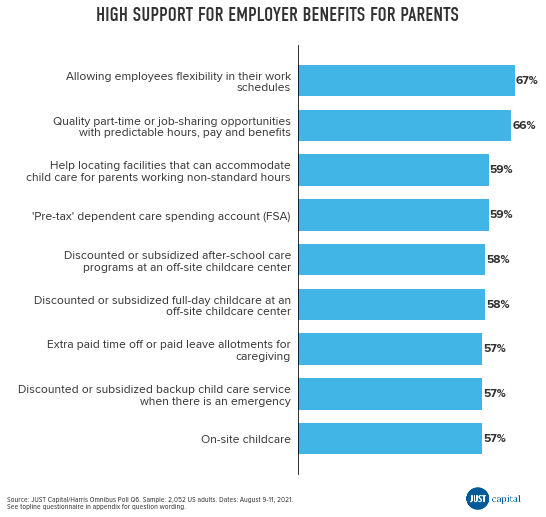

In [14]:
fig, ax = plt.subplots(figsize=(7.5,7))

fontsize_yticks = 12
fontsize_title = 20
fontsize_datalabs = 12
fontsize_caption = 8

ax.set_xlim(xmax = 72)

ax.barh(data['label'], data['tot'], height = 0.7, color = '#41B6E6')
ax.set_xticks([])
ax.set_yticks(data.index)
ax.set_yticklabels(labels=data['label'].apply(lambda x: textwrap.fill(x, 50)), 
                   color = text_color, fontsize=fontsize_yticks)
fig.suptitle("High support for employer benefits for parents".upper(), 
             ha='center', va='center', fontsize=fontsize_title, fontproperties = 'DIN Condensed')

for x,y in zip(data['tot'], data['label']):
    label = f"{x}%"
    ax.annotate(label,
                (x+4,y),
                ha='center',
                va='center',
                fontsize=fontsize_datalabs,
                weight = 'bold')  

sns.despine(bottom=True)
fig.tight_layout(rect = (0, 0.05, 1, 1))

# create caption
captext = '''Source: JUST Capital/Harris Omnibus Poll Q6. Sample: 2,052 US adults. Dates: August 9-11, 2021. 
See topline questionnaire in appendix for question wording.'''
fig.text(x = 0, y =0, 
         ha = 'left', va = 'bottom',
         s = captext, fontdict={'family':'Proxima Nova Condensed', 'fontsize':fontsize_caption})

# insert logo image
logo = plt.imread('../assets/Just Capital_Logo_RGB_500px_SSf.png')
newax = fig.add_axes([0.85,0,0.1,0.1], anchor='SE', zorder=1)
newax.imshow(logo)
newax.axis('off')

# save image file
#plt.show();
fig.savefig('../images/fig11.png', transparent = True, dpi=300, bbox_inches='tight');